In [1]:
from pymopt.voxel_gpu import VoxelPlateModel

from scipy import stats
import numpy as np
import pandas as pa
import time

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks", {'grid.linestyle': '--'})
import warnings
warnings.filterwarnings('ignore')

In [2]:
def radialDistance(p,w,nn,dr):
    alpha = np.array([(i)*dr for i in range(nn+1)])
    da = np.array([2*np.pi*(i+0.5)*dr**2 for i in range(nn)])
    r = np.sqrt(p[0]**2+p[1]**2)
    Rdr = []
    for i in range(nn):
        index = np.where((alpha[i]<r)&(alpha[i+1]>=r))[0]
        Rdr.append(w[index].sum())
    Rdr = np.array(Rdr)/(da*nPh)
    return alpha[:-1],Rdr

def AngularyResolved(v,w,nn):
    da = np.pi/(2*nn)
    alpha = np.array([(i+0.5)*da for i in range(nn+1)])
    alpha2 = np.array([(i)*da for i in range(nn+1)])
    do = 4*np.pi*np.sin(alpha)*np.sin(da/2)
    at = np.arccos(np.sign(v[2])*(v[2]))
    Rda = []
    for i in range(nn):
        index = np.where((alpha2[i]<at)&(alpha2[i+1]>=at))[0]
        Rda.append(w[index].sum())
    Rda = np.array(Rda)/(do[:-1]*nPh)
    return alpha[:-1],Rda

# Computation Results of single-solidmodel and mcml

## Total diffuse reflectance and total transmittance

### slab of turbid medium

In [10]:

nPh = 5000
params = {
    'thickness':[0.02],
    'ms':[90],
    'ma':[10],
    'g':[0.75],
    'n':[1.],
    'n_air':1.,
    'x_size':10,'y_size':10,
    'voxel_space':0.01,
}

n_times = 10

Rd=[];Tt=[]
for i in range(n_times):
    model = VoxelPlateModel(nPh = nPh)
    model.build(**params)
    model = model.start(i)
    RdTt = model.getRdTtValues()
    Rd.append(RdTt['Rd'])
    Tt.append(RdTt['Td'])

Memory area size for voxel storage: 4.016 Mbyte

###### Start (Random seed: 0) ######

###### End ######
######
Mean Rd 0.096539
Mean Td 0.666651

Calculation time: 0 minutes 0.049 seconds.
Memory area size for voxel storage: 4.016 Mbyte

###### Start (Random seed: 1) ######

###### End ######
######
Mean Rd 0.095231
Mean Td 0.664575

Calculation time: 0 minutes 0.062 seconds.
Memory area size for voxel storage: 4.016 Mbyte

###### Start (Random seed: 2) ######

###### End ######
######
Mean Rd 0.100886
Mean Td 0.658882

Calculation time: 0 minutes 0.049 seconds.
Memory area size for voxel storage: 4.016 Mbyte

###### Start (Random seed: 3) ######

###### End ######
######
Mean Rd 0.104925
Mean Td 0.649938

Calculation time: 0 minutes 0.062 seconds.
Memory area size for voxel storage: 4.016 Mbyte

###### Start (Random seed: 4) ######

###### End ######
######
Mean Rd 0.092784
Mean Td 0.664579

Calculation time: 0 minutes 0.047 seconds.
Memory area size for voxel storage: 4.016 Mbyte

#

In [11]:
print('Mean Rd %0.6f, sd_error %0.6f'%(np.mean(Rd),np.std(Rd)/np.sqrt(n_times)))
print('Mean Tt %0.6f, sd_error %0.6f'%(np.mean(Tt),np.std(Tt)/np.sqrt(n_times)))

Mean Rd 0.096959, sd_error 0.001149
Mean Tt 0.661536, sd_error 0.001682


### Semi-infinite turbid medium that has mismatched refractive index with the ambient medium

In [13]:
nPh = 5000
params = {
    'thickness':[10],
    'ms':[90],
    'ma':[10],
    'g':[0.],
    'n':[1.5],
    'n_air':1.,
    'x_size':10,'y_size':10,
    'voxel_space':1,
}

n_times = 10

Rd=[];Tt=[]
for i in range(n_times):
    model = VoxelPlateModel(nPh = nPh)
    model.build(**params)
    model = model.start(i)
    RdTt = model.getRdTtValues()
    Rd.append(RdTt['Rd'])
    Tt.append(RdTt['Td'])

Memory area size for voxel storage: 0.002 Mbyte

###### Start (Random seed: 0) ######

###### End ######
######
Mean Rd 0.216193
Mean Td 0.000000

Calculation time: 0 minutes 0.057 seconds.
Memory area size for voxel storage: 0.002 Mbyte

###### Start (Random seed: 1) ######

###### End ######
######
Mean Rd 0.220656
Mean Td 0.000000

Calculation time: 0 minutes 0.062 seconds.
Memory area size for voxel storage: 0.002 Mbyte

###### Start (Random seed: 2) ######

###### End ######
######
Mean Rd 0.221302
Mean Td 0.000000

Calculation time: 0 minutes 0.058 seconds.
Memory area size for voxel storage: 0.002 Mbyte

###### Start (Random seed: 3) ######

###### End ######
######
Mean Rd 0.219405
Mean Td 0.000000

Calculation time: 0 minutes 0.062 seconds.
Memory area size for voxel storage: 0.002 Mbyte

###### Start (Random seed: 4) ######

###### End ######
######
Mean Rd 0.217548
Mean Td 0.000000

Calculation time: 0 minutes 0.060 seconds.
Memory area size for voxel storage: 0.002 Mbyte

#

In [14]:
print('Mean Rd %0.6f, sd_error %0.6f'%(np.mean(Rd),np.std(Rd)/np.sqrt(len(Rd))))
print('Mean Tt %0.6f, sd_error %0.6f'%(np.mean(Tt),np.std(Tt)/np.sqrt(len(Tt))))

Mean Rd 0.219197, sd_error 0.000793
Mean Tt 0.000000, sd_error 0.000000


## Angularly resolved diffuse reflectance and transmittance

In [20]:
nPh = 500000
params = {
    'thickness':[0.02],
    'ms':[90],
    'ma':[10],
    'g':[0.75],
    'n':[1.],
    'n_air':1.,
    'x_size':4,'y_size':4,
    'voxel_space':0.001,
}

model = VoxelPlateModel(nPh = nPh)
model.build(**params)
model = model.start()

rez = model.get_result()
v_result = rez["v"]
w_result = rez["w"]
Tt_index = np.where(v_result[2]>0)[0]
Rd_index = np.where(v_result[2]<0)[0]

Memory area size for voxel storage: 352.352 Mbyte

###### Start ######


###### End ######
######
Mean Rd 0.098583
Mean Td 0.658905

Calculation time: 0 minutes 0.583 seconds.


Trancemittance


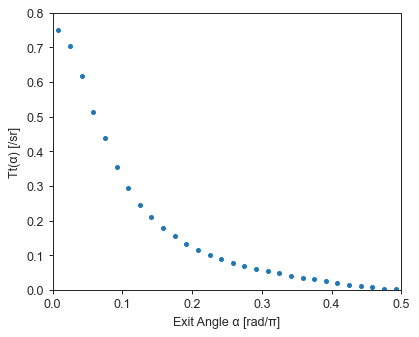

In [21]:
print('Trancemittance')
nn = 30
alpha,Tta = AngularyResolved(v_result[:,Tt_index],w_result[Tt_index],nn)

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha/np.pi,Tta,'.')
plt.xlabel('Exit Angle α [rad/π]')
plt.ylabel('Tt(α) [/sr]')
plt.xlim(0,0.5)
plt.ylim(0,0.8)
plt.show()

Refrected


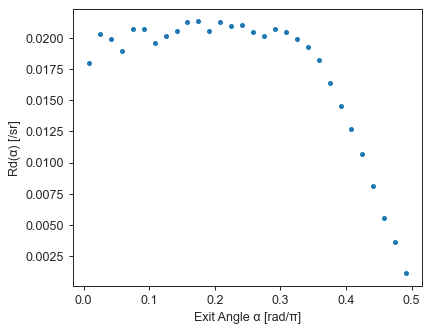

In [22]:
print('Refrected')
nn = 30
alpha,Rda = AngularyResolved(v_result[:,Rd_index],w_result[Rd_index],nn)

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha/np.pi,Rda,'.')
plt.xlabel('Exit Angle α [rad/π]')
plt.ylabel('Rd(α) [/sr]')
#plt.xlim(0,0.5)
#plt.ylim(0,0.025)
plt.show()

In [35]:
nPh = 1000000
params = {
    'thickness':[20],
    'ms':[100],
    'ma':[0.1],
    'g':[0.9],
    'n':[1.],
    'n_air':1.,
    'x_size':20,'y_size':20,
    'voxel_space':1,
}

model = VoxelPlateModel(nPh = nPh)
model.build(**params)
model = model.start()

rezA = model.get_result()
p_resultA = rezA["p"]
v_resultA = rezA["v"]
w_resultA = rezA["w"]
Tt_indexA = np.where(v_resultA[2]>0)[0]
Rd_indexA = np.where(v_resultA[2]<0)[0]

Memory area size for voxel storage: 0.011 Mbyte

###### Start (Random seed: 22153) ######

###### End ######
######
Mean Rd 0.745984
Mean Td 0.000000

Calculation time: 0 minutes 2.404 seconds.


In [36]:

params = {
    'thickness':[20],
    'ms':[10],
    'ma':[0.1],
    'g':[0.],
    'n':[1.],
    'n_air':1.,
    'x_size':20,'y_size':20,
    'voxel_space':1,
}

model = VoxelPlateModel(nPh = nPh)
model.build(**params)
model = model.start()

rezB = model.get_result()
p_resultB = rezB["p"]
v_resultB = rezB["v"]
w_resultB = rezB["w"]
Tt_indexB = np.where(v_resultB[2]>0)[0]
Rd_indexB = np.where(v_resultB[2]<0)[0]

Memory area size for voxel storage: 0.011 Mbyte

###### Start (Random seed: 96114) ######

###### End ######
######
Mean Rd 0.752944
Mean Td 0.000000

Calculation time: 0 minutes 0.340 seconds.


In [37]:
nn = 200
dr = 0.005


alphaA,RdrA = radialDistance(p_resultA[:,Rd_indexA],w_resultA[Rd_indexA],nn,dr)
alphaB,RdrB = radialDistance(p_resultB[:,Rd_indexB],w_resultB[Rd_indexB],nn,dr)

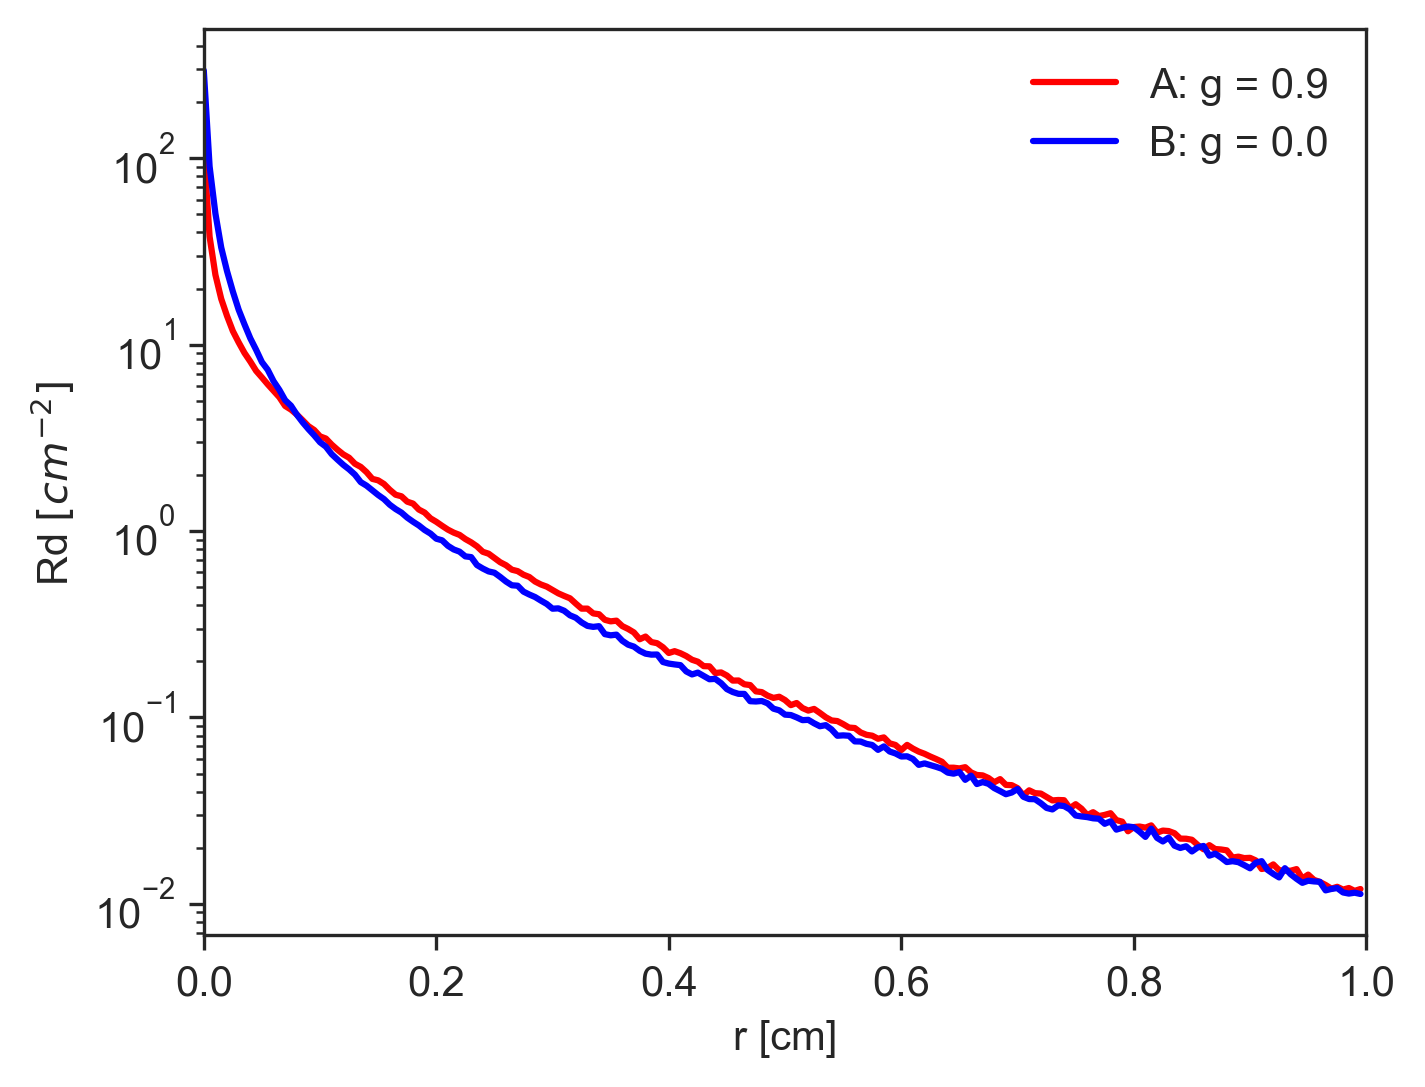

In [39]:

plt.figure(figsize=(5,4),dpi=300)
plt.plot(alphaA,RdrA,'-',c = 'red',label = 'A: g = 0.9')
plt.plot(alphaB,RdrB,'-',c = 'blue',label = "B: g = 0.0")
plt.yscale('log')
plt.xlim(0,1)
plt.legend(frameon=False)
plt.xlabel('r [cm]')
plt.ylabel('Rd $[cm^{-2}]$')
plt.show()

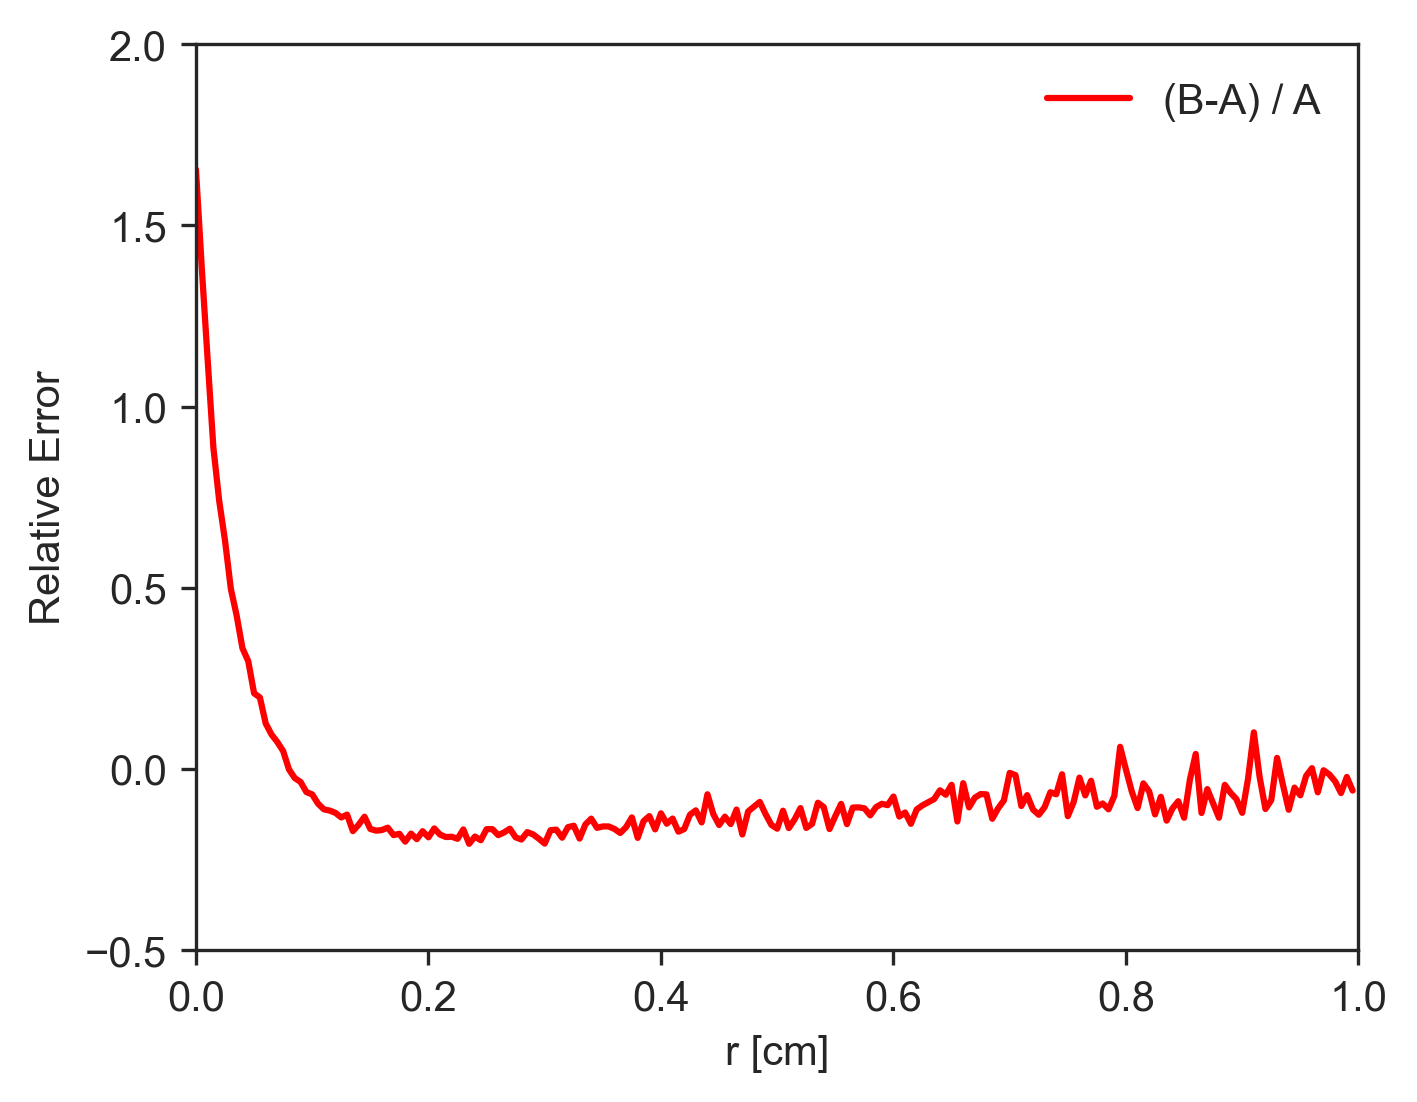

In [40]:
plt.figure(figsize=(5,4),dpi=300)
plt.plot(alphaA,(RdrB-RdrA)/RdrA,'-',c = 'red',label = '(B-A) / A')
plt.xlim(0,1)
plt.ylim(-0.5,2)
plt.legend(frameon=False)

plt.xlabel('r [cm]')
plt.ylabel('Relative Error')
plt.show()

# Multi-layered Tissues

## Refrective and transmittnace rate

In [30]:
nPh = 1000000
params = {
    'thickness':[0.1,0.1,0.2],
    'ms':[100,10,10],
    'ma':[1,1,2],
    'g':[0.9,0,0.7],
    'n':[1.37,1.37,1.37],
    'n_air':1.,
    'x_size':10,'y_size':10,
    'voxel_space':0.1,
}
model = VoxelPlateModel(nPh = nPh)
model.build(**params)

start = time.time()
model = model.start()
print('%s sec'%(time.time()-start))

rez = model.get_result()
p_result = rez["p"]
v_result = rez["v"]
w_result = rez["w"]

Tt_index = np.where(v_result[2]>0)[0]
Rd_index = np.where(v_result[2]<0)[0]

Memory area size for voxel storage: 0.062 Mbyte

###### Start (Random seed: 53854) ######

###### End ######
######
Mean Rd 0.239058
Mean Td 0.096128

Calculation time: 0 minutes 0.467 seconds.
0.48817968368530273 sec


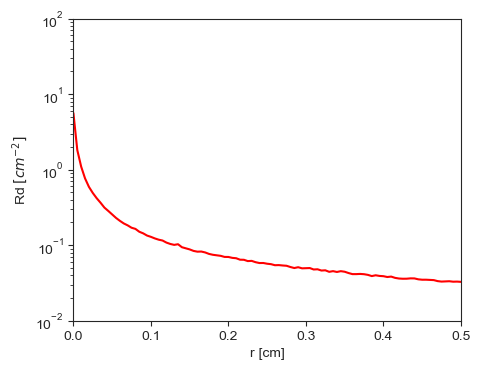

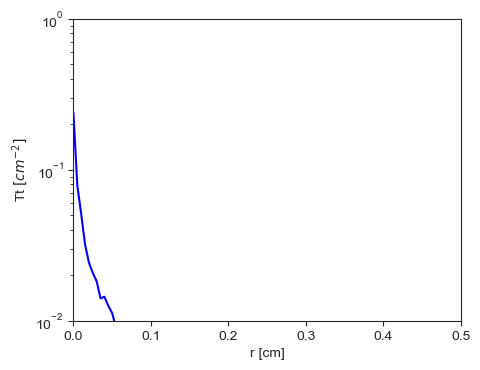

In [165]:
nn = 400
dr = 0.005

alphaRd,Rd = radialDistance(p_result[:,Rd_index],w_result[Rd_index],nn,dr)
alphaTt,Tt = radialDistance(p_result[:,Tt_index],w_result[Tt_index],nn,dr)

plt.figure(figsize=(5,4),dpi=100)
plt.plot(alphaRd,Rd,'-',c = 'red')
plt.yscale('log')
plt.xlim(0,0.5)
plt.ylim(10**-2,10**2)
plt.xlabel('r [cm]')
plt.ylabel('Rd $[cm^{-2}]$')
plt.show()

plt.figure(figsize=(5,4),dpi=100)
plt.plot(alphaTt,Tt,'-',c = 'blue')
plt.yscale('log')
plt.xlim(0,0.5)
plt.ylim(10**-2,1)
plt.xlabel('r [cm]')
plt.ylabel('Tt $[cm^{-2}]$')
plt.show()

In [34]:
"""df =pa.DataFrame()
df["alpha"] = alphaRd
df["Rd"] = Rd
df["Td"] = Tt
df.to_csv("res_multi_1e6.csv",index=None)"""

## ボクセルサイズを小さくするとどの程度劣化するか

In [174]:
nPh = 10000000
nn = 200
dr = 0.01
params = {
    'thickness':[5],
    'ms':[10],
    'ma':[0.01],
    'g':[0.9],
    'n':[1.5],
    'n_air':1.,
    'x_size':5,'y_size':5,
    'voxel_space':5,
}
list_size = [5,1,0.5,0.1,0.05,0.01,0.005]
list_size = [5,0.005]

Rd_list = []
Td_list = []
for i in list_size:
    print(i, " mm")
    params["voxel_space"] = i
    model = VoxelPlateModel(nPh = nPh)
    model.build(**params)
    model = model.start(0)

    rez = model.get_result()
    p_result = rez["p"]
    v_result = rez["v"]
    w_result = rez["w"]
    Rd_index = np.where(v_result[2]<0)[0]
    Td_index = np.where(v_result[2]>0)[0]
    alpha,Rdr = radialDistance(p_result[:,Rd_index],w_result[Rd_index],nn,dr)
    alpha,Tdr = radialDistance(p_result[:,Td_index],w_result[Td_index],nn,dr)
    Rd_list.append(Rdr)    
    Td_list.append(Tdr)

5  mm
Memory area size for voxel storage: 0.000 Mbyte

###### Start (Random seed: 0) ######

###### End ######
######
Mean Rd 0.527945
Mean Td 0.343134

Calculation time: 0 minutes 1.687 seconds.
0.005  mm
Memory area size for voxel storage: 1006.012 Mbyte

###### Start (Random seed: 0) ######

###### End ######
######
Mean Rd 0.527955
Mean Td 0.343120

Calculation time: 0 minutes 23.512 seconds.


In [68]:
time_rec

array([4743833.0170778 , 4699248.12030075, 2321262.76694522,
        404040.4040404 ])

In [82]:
time_rec =np.array(
    [
        [1.062,0.967,1.065,1.618, 2.212,6.917,12.150 ],
        [1.103,0.966,1.064,1.605, 2.160,6.931,12.267 ],
        [1.085,0.974,1.068,1.650, 2.174,6.966,12.188 ],
    ])
time_rec.mean(0)

array([ 1.08333333,  0.969     ,  1.06566667,  1.62433333,  2.182     ,
        6.938     , 12.20166667])

In [86]:
speed_mean

array([4616494.80925406, 5160028.15989512, 4691910.58037561,
       3078600.89522001, 2291706.88283758,  720675.12975382,
        409786.61109648])

In [89]:
speed_sd

array([71680.93662456, 18906.00485887,  7477.02013509, 35647.69545129,
       22960.05002744,  2137.59117955,  1634.0786422 ])

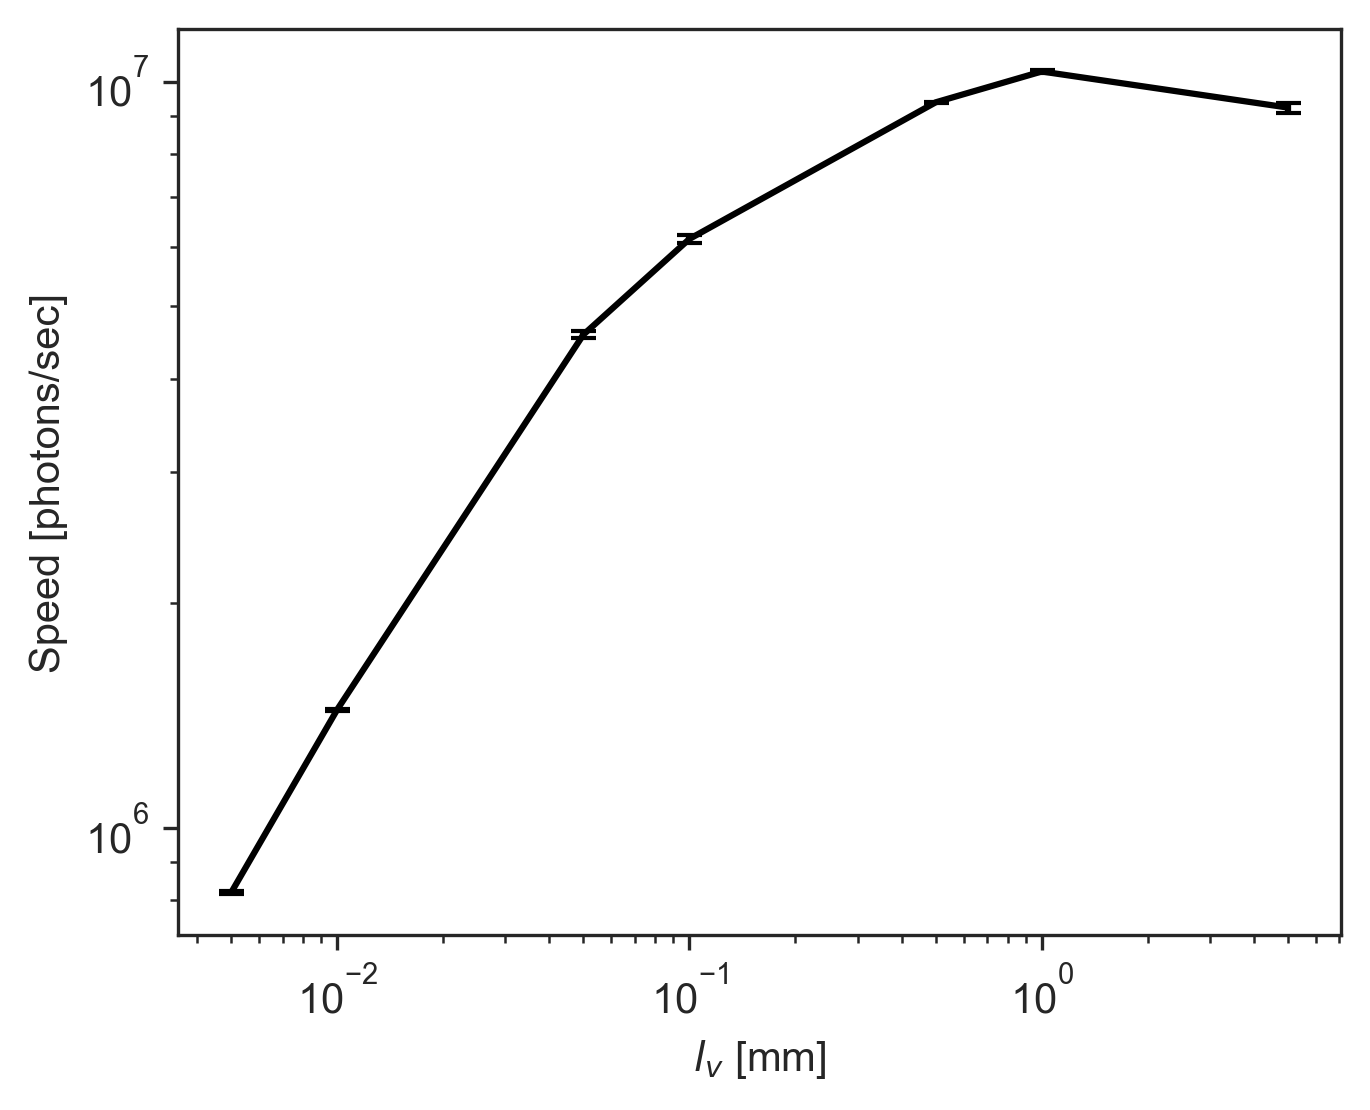

In [185]:
time_rec =np.array(
    [
        [1.062,0.967,1.065,1.618, 2.212,6.917,12.150 ],
        [1.103,0.966,1.064,1.605, 2.160,6.931,12.267 ],
        [1.085,0.974,1.068,1.650, 2.174,6.966,12.188 ],
    ])
speed_mean = (nPh/time_rec).mean(0)
speed_sd = (nPh/time_rec).std(0)
list_size_ = [5,1,0.5,0.1,0.05,0.01,0.005]
plt.figure(figsize=(5,4),dpi=300)
plt.errorbar(list_size_,speed_mean,yerr=speed_sd,#marker="o",
             capsize = 3,color ="k")
plt.xscale('log')
plt.yscale('log')

plt.xlabel('$l_v$ [mm]')
plt.ylabel('Speed [photons/sec]')
plt.savefig("speed_lv.tif",format="tif",dpi=300)

plt.show()

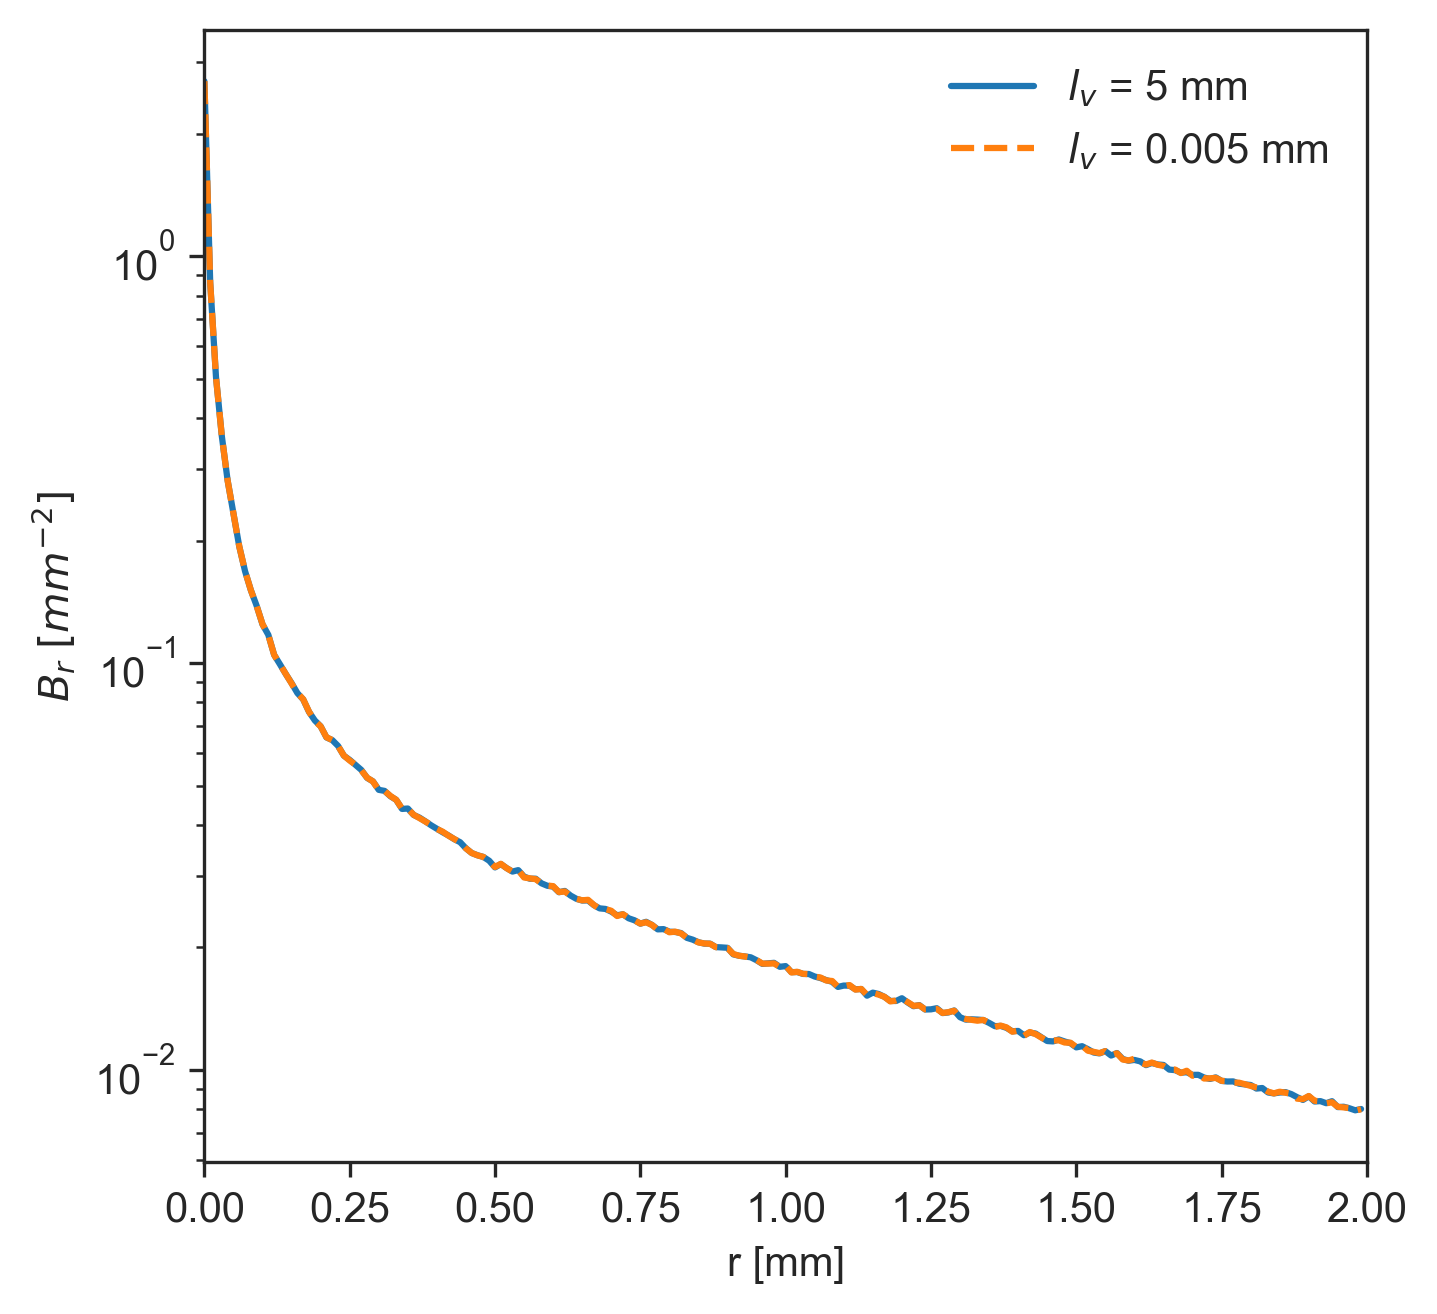

In [186]:
plt.figure(figsize=(5,5),dpi=300)
mk = ["-","--"]

for i in range(len(list_size)):
    label = "$l_v$ = "+ str(list_size[i])+" mm"
    plt.plot(alpha,Rd_list[i],mk[i],label=label)
plt.yscale('log')
plt.legend(frameon=False)

plt.xlim(0,2)
#plt.ylim(10**-2,10**1)
plt.xlabel('r [mm]')
plt.ylabel('$B_r$ $[mm^{-2}]$')
plt.savefig("br_.tif",format="tif",dpi=300)
plt.show()



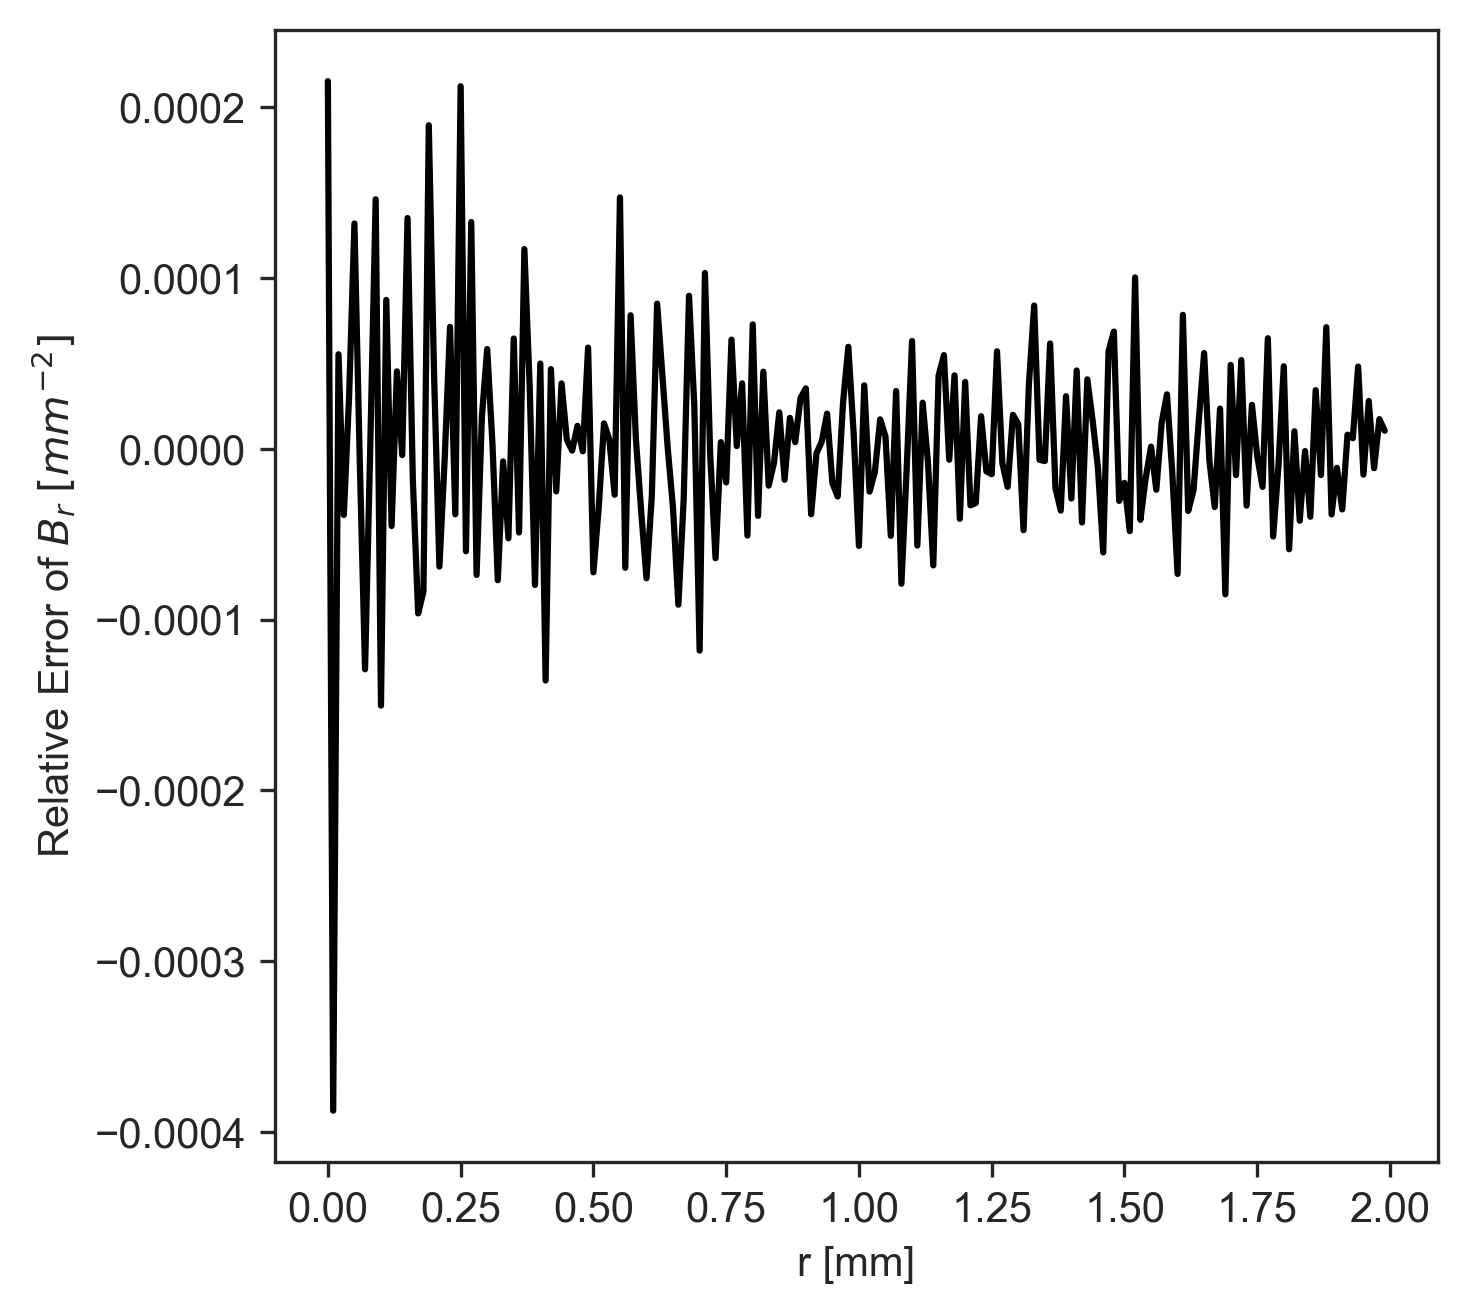

In [176]:
plt.figure(figsize=(5,5),dpi=300)
plt.plot(alpha,(Rd_list[0]-Rd_list[1]),'-',c="k")
plt.xlabel('r [mm]')
plt.ylabel('Relative Error of $B_r$ $[mm^{-2}]$')

plt.savefig("br_diff.tif",format="tif",dpi=300)
plt.show()


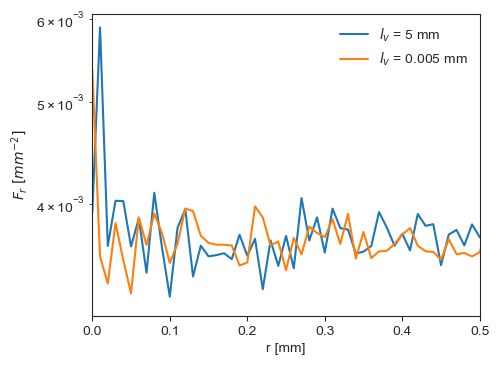

In [134]:
plt.figure(figsize=(5,4),dpi=100)
for i in range(len(list_size)):
    label = "$l_v$ = "+ str(list_size[i])+" mm"
    plt.plot(alpha,Td_list[i],'-',label=label)
plt.yscale('log')
plt.legend(frameon=False)

plt.xlim(0,0.5)
#plt.ylim(10**-2,10**1)
plt.xlabel('r [mm]')
plt.ylabel('$F_r$ $[mm^{-2}]$')
plt.show()

In [4]:
niteral = 3
nn = 100
dr = 0.01
params = {
    'thickness':[5],
    'ms':[10],
    'ma':[0.01],
    'g':[0.9],
    'n':[1.5],
    'n_air':1.,
    'x_size':5,'y_size':5,
    'voxel_space':0.5,
}
list_nPh = [1e3,1e4,1e5,1e6,1e7,1e8]

Rd_list = []
Td_list = []
time_list = []
for j in range(niteral):
    sub_list =[]
    for i in list_nPh:
        print(i, " mm")
        model = VoxelPlateModel(nPh = i)
        model.build(**params)
        st = time.time()
        model = model.start()
        ed = time.time()-st
        sub_list.append(ed)

    time_list.append(sub_list)

1000.0  mm
Memory area size for voxel storage: 0.002 Mbyte

###### Start (Random seed: 33423) ######

###### End ######
######
Mean Rd 0.535912
Mean Td 0.337379

Calculation time: 0 minutes 0.097 seconds.
10000.0  mm
Memory area size for voxel storage: 0.002 Mbyte

###### Start (Random seed: 10957) ######

###### End ######
######
Mean Rd 0.524671
Mean Td 0.347108

Calculation time: 0 minutes 0.107 seconds.
100000.0  mm
Memory area size for voxel storage: 0.002 Mbyte

###### Start (Random seed: 45218) ######

###### End ######
######
Mean Rd 0.526718
Mean Td 0.344755

Calculation time: 0 minutes 0.220 seconds.
1000000.0  mm
Memory area size for voxel storage: 0.002 Mbyte

###### Start (Random seed: 28294) ######

###### End ######
######
Mean Rd 0.527930
Mean Td 0.343594

Calculation time: 0 minutes 0.282 seconds.
10000000.0  mm
Memory area size for voxel storage: 0.002 Mbyte

###### Start (Random seed: 4221) ######

###### End ######
######
Mean Rd 0.528030
Mean Td 0.343587

Calculati

In [17]:
speed_mean = (np.array(list_nPh)/np.array(time_list)).mean(0)
tt_mean = np.array(time_list).mean(0)
speed_sd = (np.array(list_nPh)/np.array(time_list)).std(0)
tt_sd = np.array(time_list).std(0)
df = pa.DataFrame({
    "nPh":list_nPh,
    "speed_mean":speed_mean,
    "speed_sd":speed_sd,
    "tt_mean":tt_mean,
    "tt_sd":tt_sd,
})
df.to_csv("speed_gpu.csv",index=None)

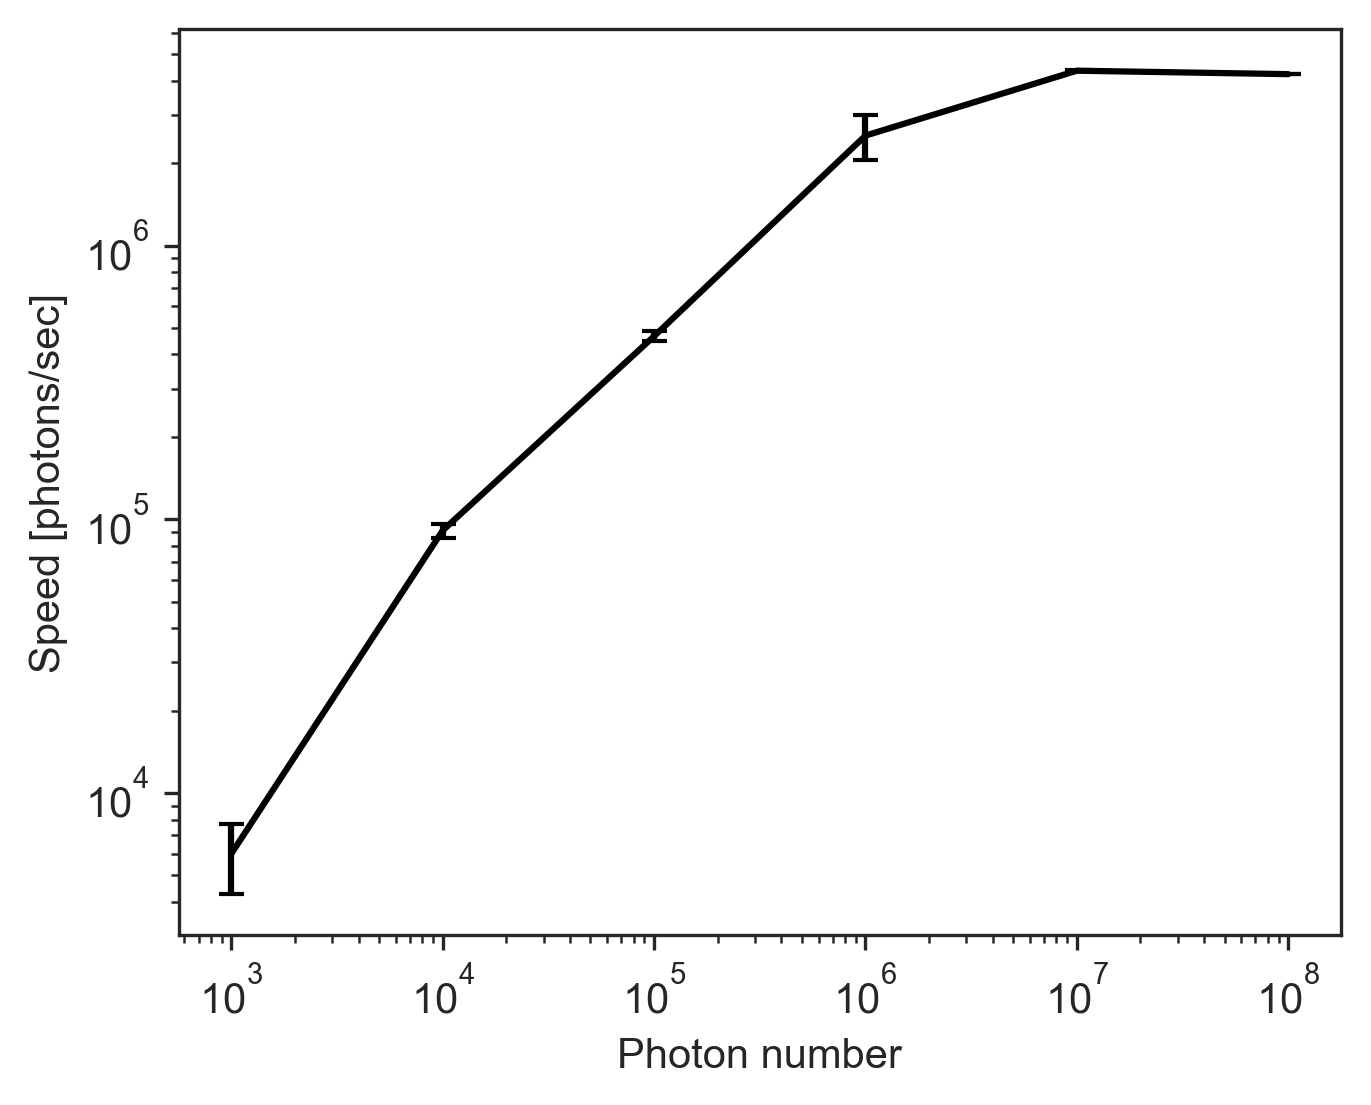

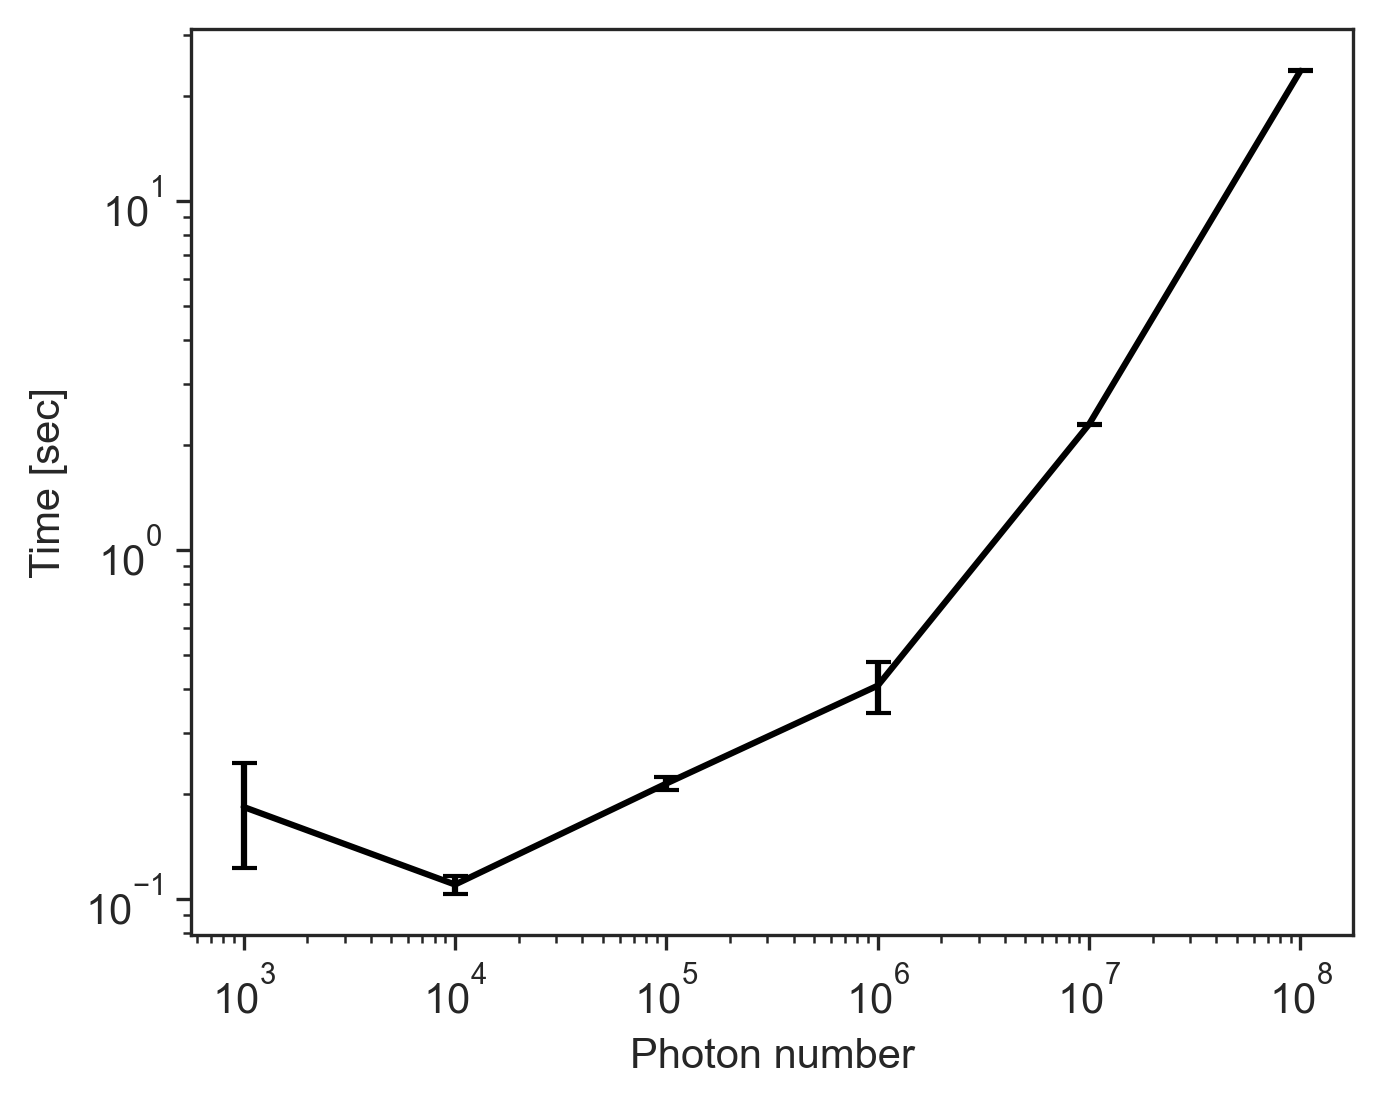

In [184]:


plt.figure(figsize=(5,4),dpi=300)
plt.errorbar(list_nPh,speed_mean,yerr=speed_sd,
             capsize = 3,color ="k")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Photon number')
plt.ylabel('Speed [photons/sec]')
plt.savefig("speed_nph.tif",format="tif",dpi=300)
plt.show()

plt.figure(figsize=(5,4),dpi=300)
plt.errorbar(list_nPh,tt_mean,yerr=tt_sd,
             capsize = 3,color ="k")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Photon number')
plt.ylabel('Time [sec]')
plt.savefig("time_nph.tif",format="tif",dpi=300)

plt.show()

In [18]:
cpu_ = pa.read_csv("speed_cpu.csv")
cpu_

,nPh,speed_mean,speed_sd,tt_mean,tt_sd
0,1000.0,53369.410456,8922.768783,0.019293,0.003343
1,10000.0,104148.877183,3597.145721,0.096134,0.003403
2,100000.0,105113.962703,837.467187,0.951409,0.007599
3,1000000.0,105326.986025,47.014951,9.494245,0.004237
4,10000000.0,105352.948608,58.494107,94.919062,0.052717
5,100000000.0,105309.527699,45.984230,949.581878,0.414701


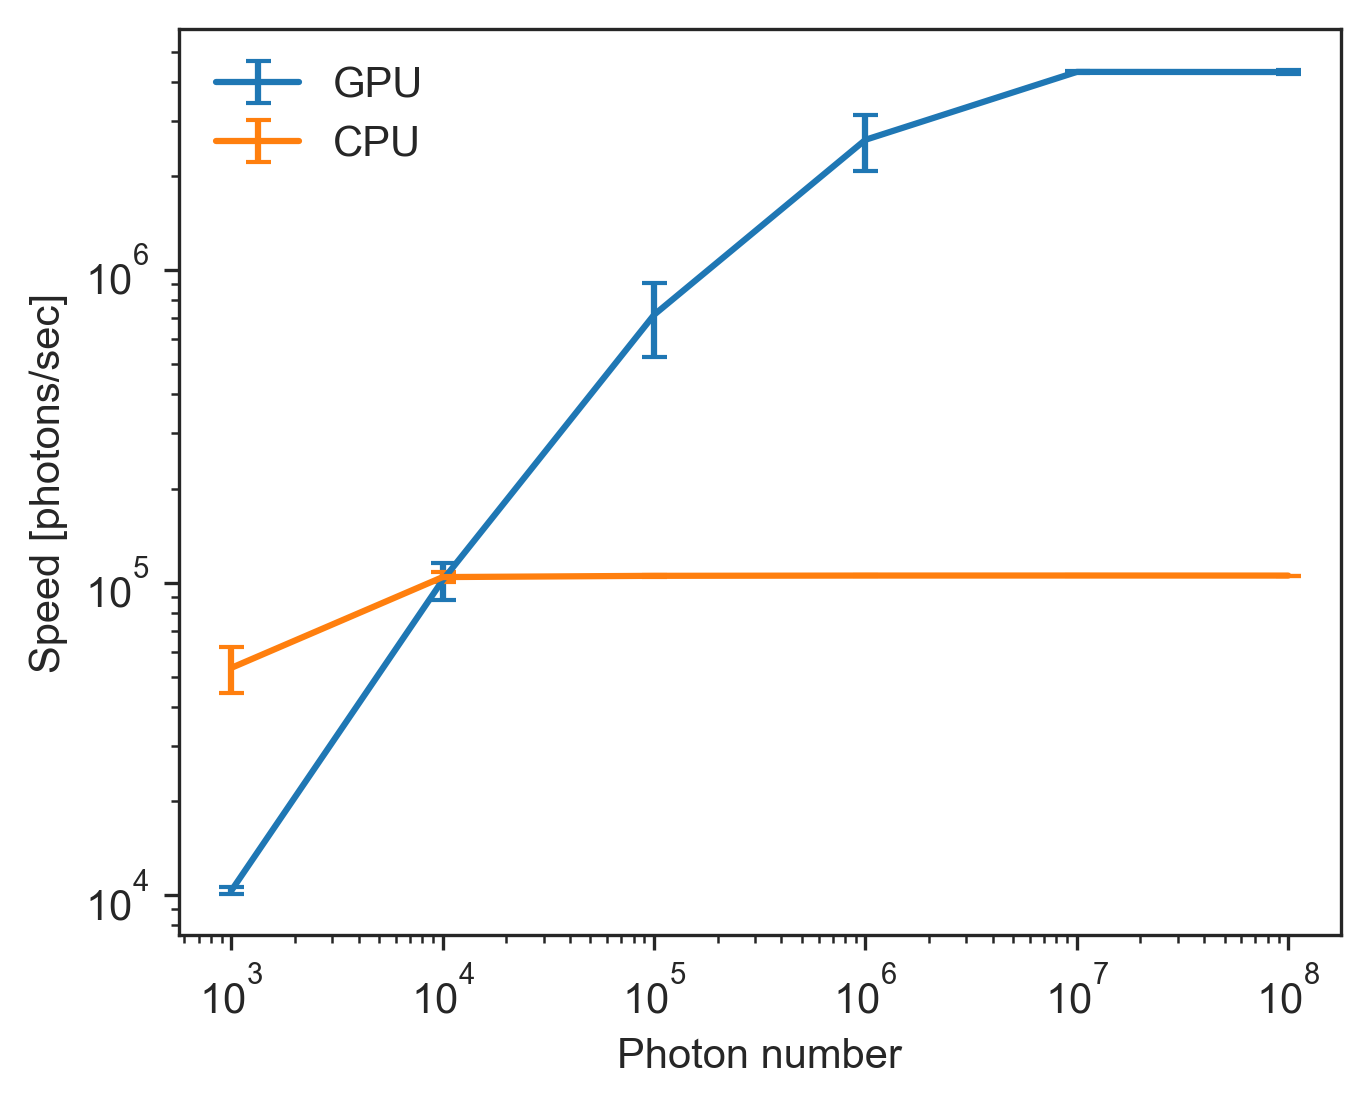

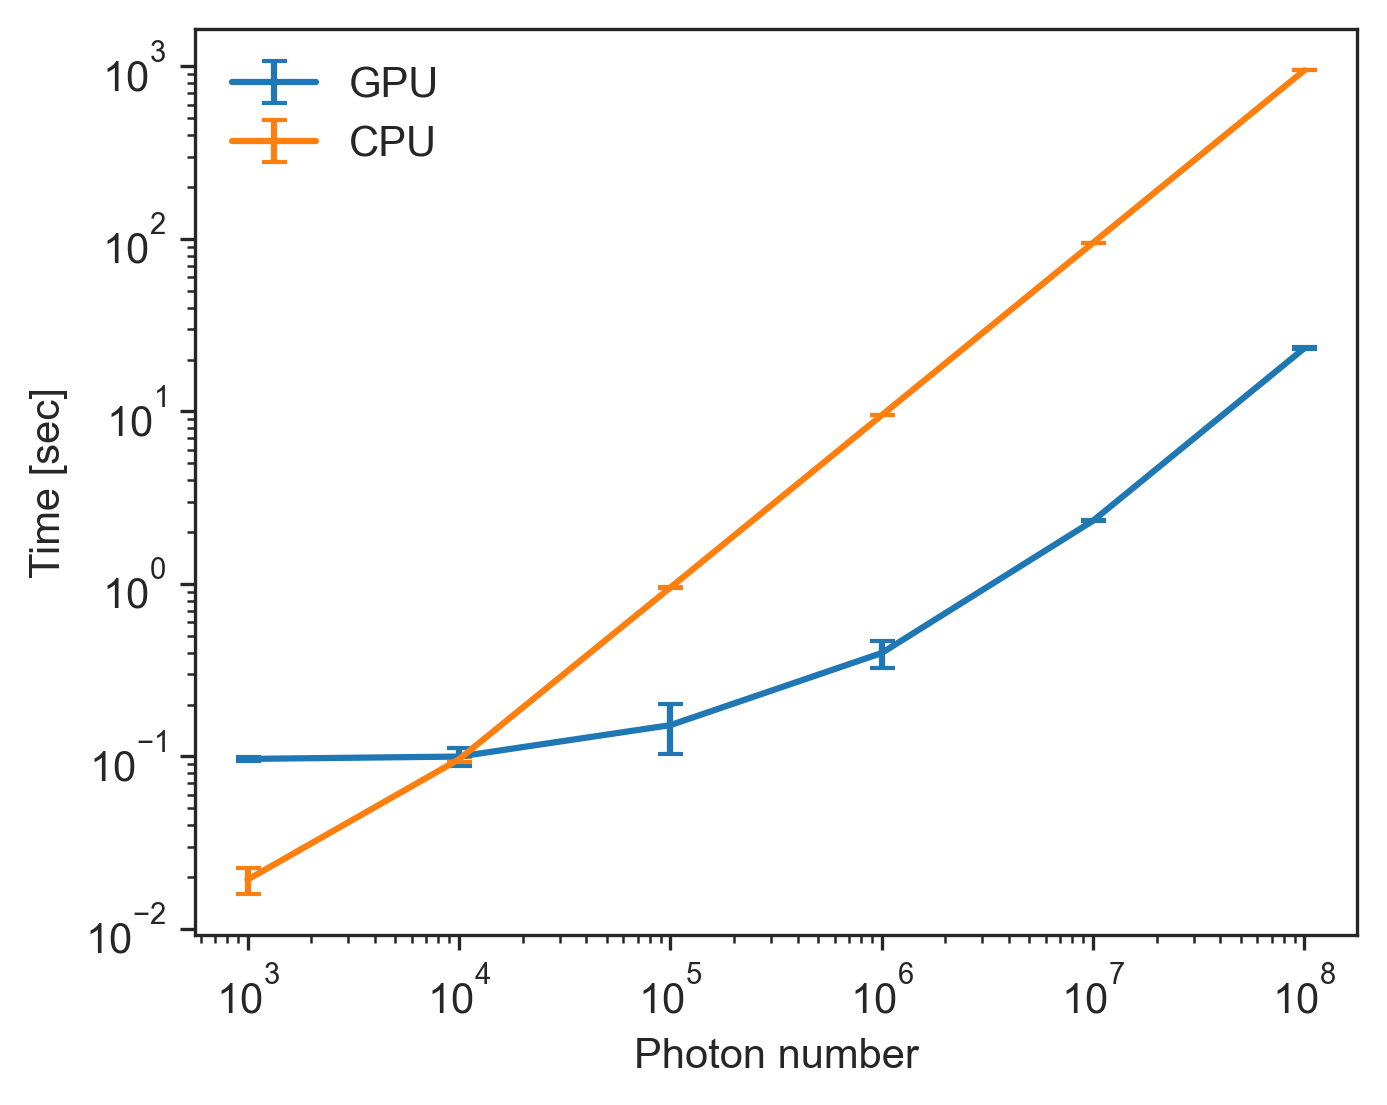

In [19]:
plt.figure(figsize=(5,4),dpi=300)
plt.errorbar(list_nPh,speed_mean,yerr=speed_sd,
             capsize = 3,label = "GPU")
plt.errorbar(cpu_.nPh,cpu_.speed_mean,yerr=cpu_.speed_sd,
             capsize = 3,label="CPU")
plt.xscale('log')
plt.yscale('log')
plt.legend(frameon=False)

plt.xlabel('Photon number')
plt.ylabel('Speed [photons/sec]')
plt.savefig("speed_nph.tif",format="tif",dpi=300)
plt.show()

plt.figure(figsize=(5,4),dpi=300)
plt.errorbar(list_nPh,tt_mean,yerr=tt_sd,
             capsize = 3,label = "GPU")
plt.errorbar(cpu_.nPh,cpu_.tt_mean,yerr=cpu_.tt_sd,
             capsize = 3,label = "CPU")
plt.legend(loc="upper left",frameon=False)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Photon number')
plt.ylabel('Time [sec]')
plt.savefig("time_nph.tif",format="tif",dpi=300)

plt.show()

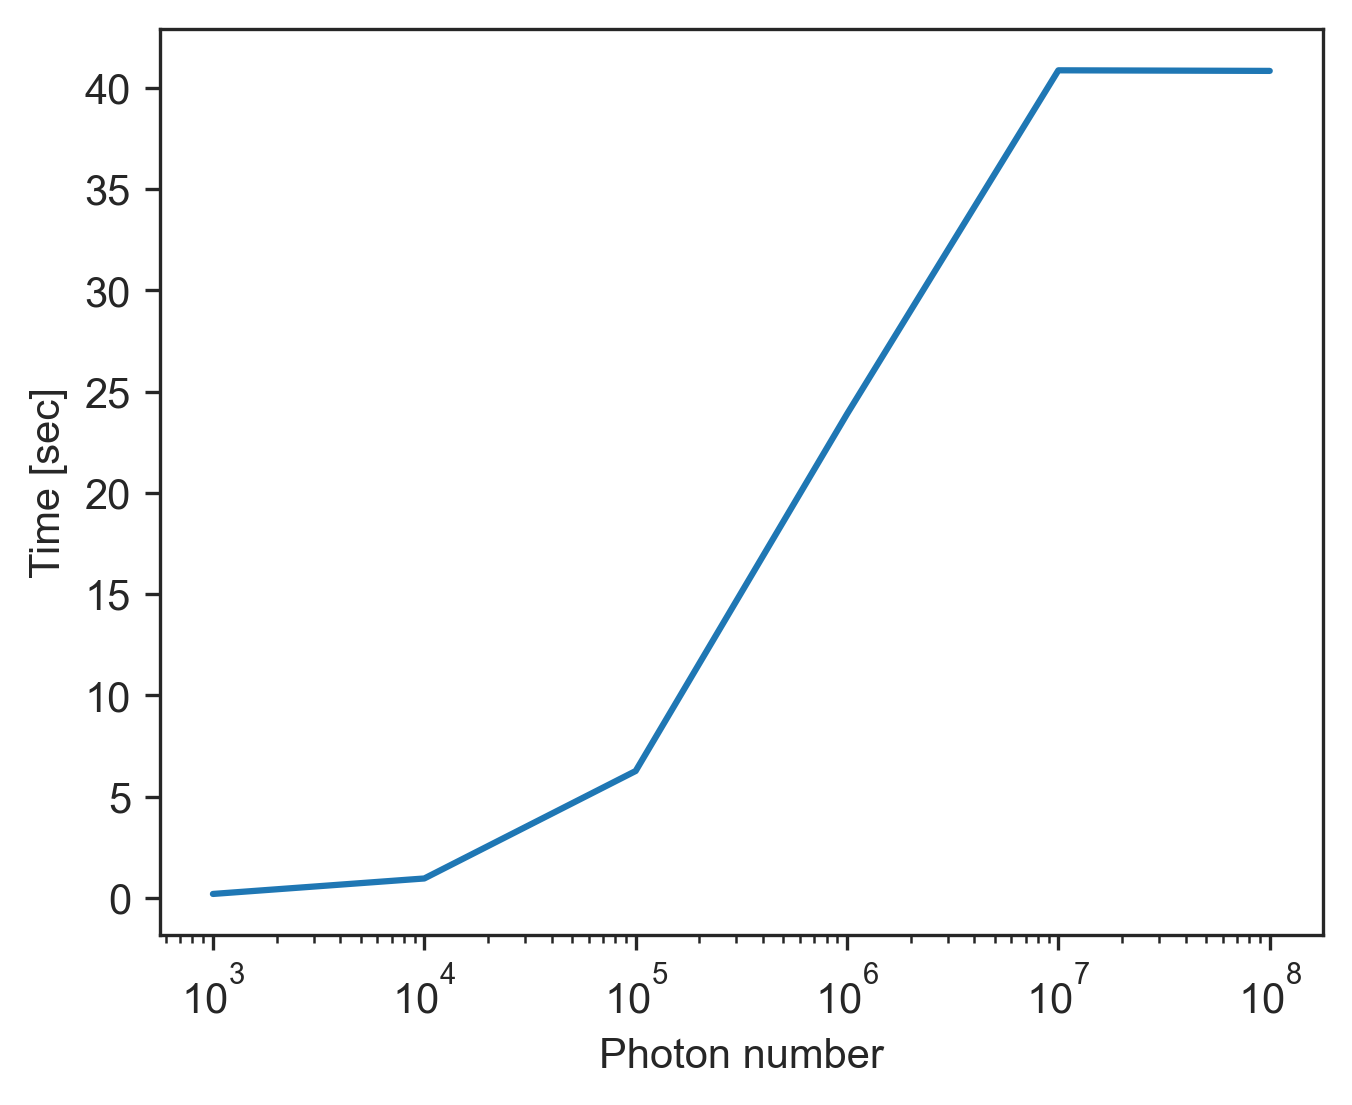

In [28]:
plt.figure(figsize=(5,4),dpi=300)
plt.plot(list_nPh,cpu_.tt_mean/tt_mean,)
#plt.plot([list_nPh[0],list_nPh[-1]],[1,1],)

plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Photon number')
plt.ylabel('Time [sec]')
#plt.savefig("time_nph.tif",format="tif",dpi=300)

plt.show()